# Probabilistic Roadmap


### 1. **Environment**: 
   - Includes the creation of obstacles and the overall environment setup.

### 2. **Supporting Data Structures**: 
   - Contains the definitions for <small>`Node`</small> and <small>`Edge`</small> classes, which represent the basic components of the roadmap and path.

### 3. **Utility Functions**: 
   - A collection of helper functions that support various operations within the code.

### 4. **Roadmap Creation Class**: 
   - The <small>`RoadMap`</small> class handles the generation and management of nodes and edges within the roadmap.

### 5. **PathFinder Class**: 
   - The <small>`PathFinder`</small> class implements algorithms to find and return path objects based on the defined roadmap.

Finally, there is one cell dedicated to object creation and executing the query.


<br>

Code to create obstacles, taken from this given repository https://github.com/crigroup/osr_course_pkgs.git

In [20]:
#!/usr/bin/env python
import numpy as np
import pylab as pl
pl.ion()


class TriangularObstacle(object):
  def __init__(self, x0, y0, x1, y1, x2, y2):
    self.x0 = x0
    self.y0 = y0
    self.x1 = x1
    self.y1 = y1
    self.x2 = x2
    self.y2 = y2

    self.A = np.zeros((3,2))
    self.C = np.zeros(3)

    a = x1 - x0
    b = y1 - y0
    c = x2 - x0
    d = y2 - y0
    if -b*c + a*d > 0:
      self.A[0, :] = -b, a
    else:
      self.A[0, :] = b, -a
    self.C[0] = np.dot(self.A[0, :], np.array([x0,y0]))

    a = x2 - x1
    b = y2 - y1
    c = x0 - x1
    d = y0 - y1
    if -b*c + a*d > 0:
      self.A[1, :] = -b, a
    else:
      self.A[1, :] = b, -a
    self.C[1] = np.dot(self.A[1, :], np.array([x1,y1]))

    a = x0 - x2
    b = y0 - y2
    c = x1 - x2
    d = y1 - y2
    if -b*c + a*d > 0:
      self.A[2, :] = -b, a
    else:
      self.A[2, :] = b, -a
    self.C[2] = np.dot(self.A[2, :], np.array([x2,y2]))


  def contains(self, x, y):
    r = np.dot(self.A, np.array([x,y])) - self.C
    return all([i>0 for i in r])

  def plot(self):
    pl.plot([self.x0,self.x1], [self.y0,self.y1], "r" , linewidth = 2)
    pl.plot([self.x1,self.x2], [self.y1,self.y2], "r" , linewidth = 2)
    pl.plot([self.x2,self.x0], [self.y2,self.y0], "r" , linewidth = 2)        

Code to create environment, taken from this given repository https://github.com/crigroup/osr_course_pkgs.git

In [21]:
class Environment(object):
  def __init__(self, size_x, size_y, n_obs):
    self.size_x = size_x
    self.size_y = size_y
    self.obs = []
    for i in range(n_obs):
      x0 = np.random.rand()*size_x
      y0 = np.random.rand()*size_y
      x1 = np.random.rand()*size_x
      y1 = np.random.rand()*size_y
      x2 = np.random.rand()*size_x
      y2 = np.random.rand()*size_y
      self.obs.append(TriangularObstacle(x0, y0, x1, y1, x2, y2))

  def check_collision(self, x, y):
    for ob in self.obs:
      if ob.contains(x, y):
        return True
    return False

  def random_query(self):
    max_attempts = 100
    found_start = False
    found_goal = False
    for i in range(max_attempts):
      x_start = np.random.rand()*self.size_x
      y_start = np.random.rand()*self.size_y
      if not self.check_collision(x_start, y_start):
        found_start = True
        break
    for i in range(max_attempts):
      x_goal = np.random.rand()*self.size_x
      y_goal = np.random.rand()*self.size_y
      if not self.check_collision(x_goal, y_goal):
        found_goal = True
        break
    if found_start and found_goal:
      return x_start, y_start, x_goal, y_goal
    else:
      return None

  def plot(self):
    pl.plot([0, self.size_x, self.size_x, 0, 0], [0, 0, self.size_y, self.size_y, 0], "k", linewidth = 2)
    for ob in self.obs:
      ob.plot()

  def plot_query(self, x_start, y_start, x_goal, y_goal):
    pl.plot([x_start], [y_start], "bs", markersize = 8)
    pl.plot([x_goal], [y_goal], "b*", markersize = 12)

  def plot_node(self, x,y):
    pl.plot([x], [y], "ko", markersize = 3)

  def plot_edge(self, edge):
    pl.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], "k" , linewidth = 0.5)

  def plot_path(self, edge, colour : str):
    pl.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], colour , linewidth = 2.0)


#### Node and Edge Classes

This code defines two data classes, `Node` and `Edge`, which represent a point in a 2D space and a connection between two nodes, respectively.

##### Node Class

The `Node` class is defined with the following attributes:

- **x (float)**: the x-coordinate of the node.
- **y (float)**: the y-coordinate of the node.

##### Methods

- <small>`__post_init__(self)`</small>:: 
  - Rounds the x and y coordinates to four decimal places after initialization.
  
- <small>`__repr__(self)`</small>: 
  - Returns a string representation of the Node object in the format <small>`Node(x=value, y=value)`</small>.

- <small>`__getitem__(self, index)`</small>: 
  - Allows indexing to access x and y values directly.
  - Returns <small>`self.x`</small> for index 0 and <small>`self.y`</small> for index 1.
  - Raises an <small>`IndexError`</small> for any other index.

- <small>`to_array(self)`</small>:
  - Converts the Node to a NumPy array for easier numerical operations.
  
##### Edge Class

The `Edge` class is defined with the following attributes:

- **node1 (Node)**: the first node of the edge.
- **node2 (Node)**: the second node of the edge.
- **distance (float)**: The distance between node1 and node2.

##### Methods

- <small>`__post_init__(self)`</small>: 
  - Rounds the distance to four decimal places after initialization.

- <small>`__repr__(self)`</small>: 
  - Returns a string representation of the Edge object in the format <small>`Edge(node1=Node, node2=Node, distance=value)`</small>.

- <small>`__getitem__(self, index)`</small>:
  - Allows indexing to access node1, node2, a


In [22]:
from dataclasses import dataclass
@dataclass(order=True, frozen=True)
class Node:
    x: float
    y: float

    def __post_init__(self):
        object.__setattr__(self, 'x', round(self.x, 4))
        object.__setattr__(self, 'y', round(self.y, 4))


    def __repr__(self):
        return f"Node(x={self.x}, y={self.y})"
    
    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("Index out of range. Use 0 for x and 1 for y.")
        
    def to_array(self):
        """Convert the Node to a NumPy array."""
        return np.array([self.x, self.y])


@dataclass(order=True, frozen=True)
class Edge:
    node1: Node
    node2: Node
    distance: float

    def __post_init__(self):
        object.__setattr__(self, 'distance', round(self.distance, 4))

    def __repr__(self):
        return f"Edge(node1={self.node1}, node2={self.node2}, distance={self.distance})"
    
    def __getitem__(self, index):
        if index == 0:
            return self.node1
        elif index == 1:
            return self.node2
        elif index == 2:
            return self.distance
        else:
            raise IndexError("Index out of range. Use 0 for x and 1 for y.")

#### Geometry Utilities for Line Validity and Distance Calculation

This code snippet contains functions to check if a line segment between two points is valid (i.e., does not intersect with any obstacles) and to calculate the distance between two points.

##### <small>`valid_edge(p1: Node, p2: Node) -> bool`</small>

This function checks whether a line connecting two points <small>`p1`</small> and <small>`p2`</small> intersects with any obstacles in the environment.

- **Parameters:**
  - <small>`p1`</small> (Node): The starting point of the line segment.
  - <small>`p2`</small> (Node): The ending point of the line segment.

- **Returns:**
  - <small>`bool`: Returns </small>`True` if the line segment does not intersect with any obstacles; <small>`False`</small> otherwise.

- **Logic:**
  - The function iterates through each obstacle in the environment.
  - It checks each edge of the obstacle for intersection with the line segment defined by <small>`p1`</small> and <small>`p2`</small>.
  - It uses linear algebra to determine if the line segments intersect by calculating the determinant and proceeds to find the point of intersection.
  - If the point of intersection is found within both line segments, the function returns <small>`False`</small>.

##### <small>`is_between(p1: Node, p2: Node, p)`</small>

This helper function checks if point <small>`p`</small> lies on the line segment defined by points <small>`p1`</small> and <small>`p2`</small>.

- **Parameters:**
  - <small>`p1`</small> (Node): One endpoint of the line segment.
  - <small>`p2`</small> (Node): The other endpoint of the line segment.
  - <small>`p`</small> (tuple): The point to check.

- **Returns:**
  - <small>`bool`</small>: Returns <small>`True`</small> if point <small>`p`</small> is between <small>`p1`</small> and <small>`p2`</small>; <small>`False`</small> otherwise.

##### <small>`calc_distance(p1: Node, p2: Node)`</small>

This function calculates the Euclidean distance between two points <small>`p1`</small> and <small>`p2`</small>.

- **Parameters:**
  - <small>`p1`</small> (Node): The first point.
  - <small>`p2`</small> (Node): The second point.

- **Returns:**
  - <small>`float`</small>: Returns the distance rounded to four decimal places.

- **Logic:**
  - The distance is computed using the formula \(sqrt{(x<sub>2</sub>-x<sub>1</sub>)^2+(y<sub>2</sub>-y<sub>1</sub>)^2}\)


In [23]:
import math
#check if a line connecting these two points is valid, ie. does not pass through any obstacles
def valid_edge(p1: Node, p2 : Node) -> bool:
    for obstacle in env.obs:
        v1 = (obstacle.x0, obstacle.y0)
        v2 = (obstacle.x1,obstacle.y1)
        v3 = (obstacle.x2, obstacle.y2)
        # #print("v1 ", v1 ," v2 ", v2 ," v3 ",v3)

        for p3, p4 in ((v1, v2), (v2 , v3), (v3, v1)):
            A1 = np.array([[p2[1] - p1[1], p1[0] - p2[0]],
                        [p4[1] - p3[1], p3[0] - p4[0]]])
            
            # Constants on the right-hand side
            B1 = np.array([p1[0] * (p2[1] - p1[1]) + p1[1] * (p1[0] - p2[0]),
                        p3[0] * (p4[1] - p3[1]) + p3[1] * (p3[0] - p4[0])])
            
            # Check if the determinant is zero (parallel lines)
            if np.linalg.det(A1) == 0:
                continue  # Lines are parallel or coincident
            
            # Solve for x and y
            intersection = np.linalg.solve(A1, B1)
            x, y = intersection[0], intersection[1]
            
            if is_between(p1, p2, (x, y)) and is_between(p3, p4, (x, y)):
                return False
            
    return True
            
# Check if intersection point lies on both line segments
def is_between(p1 : Node, p2 : Node, p):
    return min(p1[0], p2[0]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])

def calc_distance(p1 : Node,p2 : Node):
    return round(float(math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)), 4)


#### Path Class

This class represents a path consisting of nodes and edges, allowing for the reconstruction of the path from an end node to a start node.

#### <small>`class Path`</small>

The <small>`Path`</small> class is initialized with a start and end node.

- **Attributes:**
  - <small>`nodes (list[Node])`</small>: A list to store the nodes in the path.
  - <small>`edges (list[Edge])`</small>: A list to store the edges in the path.
  - <small>`start (Node)`</small>: The starting node of the path.
  - <small>`end (Node)`</small>: The ending node of the path.

#### Methods

- <small>`__init__(self, start, end)`</small>: 
  - Initializes a new path with a specified start and end node.
  
- <small>`reconstruct_path(self, came_from: dict[Node, Node])`</small>: 
  - Reconstructs the path from the end node back to the start node using a <small>`came_from`</small> (previous node) mapping.
  
  - **Parameters:**
    - <small>`came_from (dict[Node, Node])`</small>: A dictionary mapping each node to its predecessor.
  
  - **Returns:**
    - <small>`list[Edge]`</small>: Returns a list of edges representing the reconstructed path.

  - **Logic:**
    - The method starts by adding an edge from the end node to its predecessor and appending the end node to the <small>`nodes`</small> list.
    - It then iteratively follows the <small>`came_from`</small> mapping to backtrack through the nodes, appending each node and edge to their respective lists until it reaches the start node.


In [24]:
class Path():
    def __init__(self, start, end):
        self.nodes : list[Node] = []
        self.edges : list[Edge] = []
        self.start : Node = start
        self.end : Node = end
   

    def reconstruct_path(self, came_from : dict[Node , Node]):
        """Reconstruct the path from point A to B."""
        self.edges.append(Edge(self.end, came_from[self.end],calc_distance(self.end , came_from[self.end])))
        current = self.end
        self.nodes.append(self.end)
        while current in came_from or not current==self.start :
            current = came_from[current]
            self.nodes.append(current)
            if(current==self.start):
                continue
            self.edges.append(Edge(current, came_from[current], calc_distance(current, came_from[current])))
        
        #print(self.nodes)
        #for edge in self.edges:
            #print(edge)
        return (self.edges)
    

#### RoadMap Class

This class represents the roadmap consisting of nodes and edges which will be queried to find a path from start to goal.

#### <small>`class RoadMap`</small>

- **Attributes:**
  - <small>`nodes (list[Node])`</small>: A list to store the nodes in the roadmap.
  - <small>`edges (list[Edge])`</small>: A list to store the edges in the roadmap.
  - <small>`neighbours (defaultdict[Node, list[Node]])`</small>: acts as an adjacecy list for the roadmap

#### Methods
  
- <small>`__init__(self)`</small>: 
  - Initializes an empty roadmap with no nodes, edges, or neighbors.

- <small>`sample_free_space(self, num_samples, xlim, ylim)`</small>: 
  - Samples random points in the defined free space, checking for collisions with obstacles.
  
  - **Parameters:**
    - <small>`num_samples (int)`</small>: The number of nodes to sample.
    - <small>`xlim (tuple)`</small>: The limits for the x-coordinate.
    - <small>`ylim (tuple)`</small>: The limits for the y-coordinate.

  - **Logic:**
    - Random points are generated within the specified limits of the 2D space
    - If a collision is detected, it attempts to find a valid position by moving in a random direction until a free space is found using OBPRM (Obstacle based PRM sampling method)
    - A binary search is performed to refine the position before adding the node, this ensures that the node is close to the obstacle edge, allowing for better coverage

- <small>`create_edges(self, n_closest: int)`</small>: 
  - Creates edges connecting each node to its closest unconnected neighbors.

  - **Parameters:**
    - <small>`n_closest (int)`</small>: The number of closest nodes to connect.

  - **Logic:**
    - For each node, it calculates distances to other nodes, sorting them to find the nearest unconnected ones.
    - Connecting to n_closest unconnected nodes instead of n_closest nodes to avoid cases where n points are mutually close and the n+1<sup>th</sup> point is far away and remains unconnected
    - Valid edges are added based on whether the connecting line is free of obstacles.

- <small>`closest_point(self, node: Node) -> Node`</small>: 
  - Finds the closest valid point in the roadmap to the given node.

  - **Parameters:**
    - <small>`node (Node)`</small>: The node for which the closest point is to be found.

  - **Returns:**
    - <small>`Node`</small>: The closest valid node.

- <small>`start_end_edges(self, start: Node, end: Node)`</small>: 
  - Connects the start and end nodes to the roadmap using the closest_node method and checks for a valid path between them.

  - **Parameters:**
    - <small>`start (Node)`</small>: The starting point.
    - <small>`end (Node)`</small>: The ending point.

- <small>`plot_path(self, path: list[Edge])`</small>: 
  - Plots a given path on the roadmap.

- <small>`plot_opt_path(self, path: list[Edge])`</small>: 
  - Plots the optimal path on the roadmap.

- <small>`plot_nodes(self)`</small>: 
  - Visualizes all nodes in the roadmap.

- <small>`plot_edges(self)`</small>: 
  - Visualizes all edges in the roadmap.

- <small>`plot(self, p: list[Edge])`</small>: 
  - Plots the edges, nodes, and a specified path on the roadmap.



In [25]:
import math
import queue
import random
from collections import defaultdict

class RoadMap(object):
    def __init__(self):
        self.nodes : list[Node] = []
        self.edges : list[Edge] = []
        self.neighbours : defaultdict[Node, list[Node]] = defaultdict(list)

    def sample_free_space(self, num_samples, xlim, ylim):
        while len(self.nodes) < num_samples:
            x, y = round(np.random.uniform(xlim[0], xlim[1]), 4), round(np.random.uniform(ylim[0], ylim[1]), 4)
            if not env.check_collision(x,y):
                self.nodes.append(Node(x, y))
            
            #obstacle based sampling (OBPRM)
            else:
                # print("collision")
                direction = random.randint(0,6)
                unit = 0.05*max(xlim[1], ylim[1])
                x_temp, y_temp = x , y
                while (env.check_collision(x_temp,y_temp)):
                    x_temp = round(x + unit*math.cos((2*math.pi/6) * direction), 4)
                    y_temp = round(y + unit*math.sin((2*math.pi/6)*direction), 4)
                    unit*=2
                    if (x_temp>xlim[1] or x_temp<0 or y_temp>ylim[1]or y_temp<0 ):
                        break
                # print("found a valid vertice at ", x_temp, " ", y_temp)
                low_x, low_y = x, y
                high_x, high_y = x_temp, y_temp 
                while calc_distance(Node(low_x, low_y), Node(high_x, high_y))>0.1:
                    mid_x = round((low_x + high_x)/2,4)
                    mid_y = round((low_y + high_y)/2, 4)
                    if (env.check_collision(mid_x, mid_y)):
                        low_x = mid_x
                        low_y = mid_y
                    else:
                        high_x = mid_x
                        high_y = mid_y
                # print("binary search done, found a valid vertice at ", high_x, " ", high_y)               
                if (not env.check_collision(high_x, high_y)):
                    self.nodes.append(Node(high_x, high_y))
        #Making new nodes around the vertices of the obstacles to increase the effective range of our path
        self.plot_nodes()

        

    def create_edges(self ,n_closest : int):
        #print("creating edges")
        
        for i, node in enumerate(self.nodes):
            distances: list[tuple[float, Node]] = []
            
            for j, other_node in enumerate(self.nodes):
                # #print(i,j)
                if not i==j:
                    # #print(i,j)
                    dist =calc_distance(node, other_node)
                    distances.append((dist,other_node))
            distances.sort()
            count = 0
            for distance, other_node in distances: 
                if count < n_closest and not self.edges.__contains__(Edge(other_node, node, distance)):
                    if valid_edge(node, other_node):
                        count+=1
                        # #print(node, other_node)
                        self.edges.append(Edge(node, other_node, distance))
                        self.neighbours[node].append(other_node)
                        self.neighbours[other_node].append(node)
            # #print(self.edges)
        self.plot_edges()

    
    def closest_point(self, node : Node) -> Node:
        # node_ = np.array([node])
        min_dist = float('inf')
        closest_point = None
        # Iterate over each point to find the one with the minimum distance to A
        for point in (self.nodes):
            # Compute the squared Euclidean distance
            dist = np.sum((point.to_array() - node.to_array()) ** 2)
            
            # Update the minimum distance and closest point if necessary
            if dist < min_dist and valid_edge(node, point):
                min_dist = dist
                closest_point = point

        if(closest_point!=None):
            self.neighbours[node].append(closest_point)
            self.neighbours[closest_point].append(node)
        
        return (closest_point)

    
    def start_end_edges(self, start : Node, end : Node):
        start_point = self.closest_point(start)
        end_point = self.closest_point(end)
        self.nodes.append(start)
        self.nodes.append(end)
        if (start_point): 
            edge = Edge(start,start_point, calc_distance(start, start_point))
            self.edges.append(edge)
            pl.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], "r" , linewidth = 0.5)
        else: print("Start Point could not connect to RoadMap")
        
        if(end_point):
            edge = Edge(end_point, end, calc_distance(end, end_point))
            self.edges.append(edge)
            pl.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], "r" , linewidth = 0.5)
        else: print("End Point could not connect to RoadMap")
        
        if valid_edge(start, end):
            print("There is a direct path from start to end")
            edge = Edge(start, end, calc_distance(start, end))
            self.edges.append(edge)
            self.neighbours[start].append(end)
            pl.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], "r" , linewidth = 0.5)

    
    
    def plot_path(self, path: list[Edge]):
        for edge in path:
            env.plot_path(edge, "g")

    def plot_opt_path(self, path: list[Edge]):
        for edge in path:
            env.plot_path(edge, "b")

    def plot_nodes(self):
        for node in self.nodes:
            env.plot_node(node[0], node[1])
    
    def plot_edges(self):
        for edge in self.edges:
            env.plot_edge(edge)

    def plot(self, p: list[Edge]):
        self.plot_edges()
        self.plot_nodes()
        self.plot_path(p)
            


#### PathFinder Class

The `PathFinder` class is designed to find the optimal path between a start and an end node using the A* search algorithm.

##### <small>`class PathFinder`</small>

This class is initialized with a start and an end node.

- **Attributes:**
  - <small>`start (Node)`</small>: The starting point of the path.
  - <small>`end (Node)`</small>: The destination point of the path.

##### Methods

- <small>`__init__(self, start: Node, end: Node)`</small>: 
  - Initializes the pathfinder with a starting node and an ending node.

- <small>`a_star_search(self, roadMap: RoadMap) -> Path`</small>: 
  - Executes the A* search algorithm to find the shortest path in the given roadmap.

  - **Parameters:**
    - <small>`roadMap (RoadMap)`</small>: The roadmap containing nodes, edges and adjacency list.

  - **Returns:**
    - <small>`Path`</small>: The reconstructed path from start to end stored in a Path object, or <small>`None`</small>if no path exists.

  - **Logic:**
    - Initializes the open set as a priority queue and the scores for each node.
    - Iteratively processes nodes until the destination is reached or the open set is empty.
    - If the current node is the end node, reconstructs the path.

- <small>`heuristic(self, node1: Node, node2: Node)`</small>: 
  - Calculates the heuristic distance between two nodes.

  - **Parameters:**
    - <small>`node1 (Node)`</small>: The first node.
    - <small>`node2 (Node)`</small>: The second node.

  - **Returns:**
    - <small>`float`</small>: The distance calculated using the <small>`calc_distance`</small> function.

- <small>`path_processing1(self, path: Path) -> Path`</small>: 
  - Processes the path to remove unnecessary nodes based on connectivity.

  - **Parameters:**
    - <small>`path (Path)`</small>: The original path to be processed.
    
  - **Returns:**
    - <small>`Path`</small>: The processed path with potentially fewer nodes and edges.

  - **Logic:**
    - Iterates through the nodes and adds valid connections to the processed path.
    - Creates edges for the processed path based on valid connections.

In [26]:
class PathFinder():

    def __init__(self, start : Node, end : Node):
        self.start = start
        self.end = end

    def a_star_search(self, roadMap : RoadMap) -> Path:

        #print("p.start ", self.start, " p.end ", self.end)

        # Check if we are already at the destination
        if self.start == self.end :
            #print("We are already at the destination")
            return

        # Initialize the open list (unvisited cells, priority queue by f_score)
        open_set = queue.PriorityQueue()
        open_set.put((0, self.start)) # (f-score, start)
        came_from : dict[Node, Node] = {}

        g_score = {node: float('inf') for node in roadMap.nodes}
        g_score[self.start] = 0
        f_score = {node: float('inf') for node in roadMap.nodes}
        f_score[self.start] = self.heuristic(self.start, self.end)
        open_set_hash = {self.start}

        while not open_set.empty(): 
            current = open_set.get()[1]
            # #print("current : ", current)
            open_set_hash.remove(current)

            if current == self.end:
                path = Path(self.start, self.end)
                # roadMap.plot_path(p.reconstruct_path(came_from))
                path.reconstruct_path(came_from)
                # roadMap.plot_path(self.path_processing1(p, 10))
                return path
            
            for neighbor in roadMap.neighbours[current]:
                temp_g_score = g_score[current] + calc_distance(current, neighbor)
                # #print("neightbour, g_score, temp_g score ", neighbor, g_score[neighbor], temp_g_score)
                if temp_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = temp_g_score
                    f_score[neighbor] = temp_g_score + self.heuristic(neighbor, self.end)

                    if neighbor not in open_set_hash:
                        open_set.put((f_score[neighbor], neighbor))
                        open_set_hash.add(neighbor)

        return None

    def heuristic(self, node1, node2):
        return calc_distance(node1, node2)
    

    
    def path_processing1(self, path: Path) -> Path:
        processed_path = Path(self.start, self.end)
        max_index = len(path.nodes)
        i = 0
        processed_path.nodes.append(path.nodes[i])
        j = i+1
        while i<max_index-1:
            j = i+1
            while j<max_index:
            #print(i,j)
                if(valid_edge(path.nodes[i], path.nodes[j])):
                    if(j==max_index-1):
                        processed_path.nodes.append(path.nodes[j])
                        break
                    j+=1
                else:
                    processed_path.nodes.append(path.nodes[j-1])
                    i = j-1
            i+=1

        old_distance = 0.0
        new_distance = 0.0
        for _,_,distance in path.edges:
            old_distance+=distance
        for i in range(len(processed_path.nodes)-1):
            distance = calc_distance(processed_path.nodes[i], processed_path.nodes[i+1])
            new_distance+=distance
            processed_path.edges.append(Edge(processed_path.nodes[i], processed_path.nodes[i+1], distance))
        
        distance_saved = old_distance-new_distance
        print("Distance improved by ", round(distance_saved,4))
        
        return(processed_path)


## Testing

Reading the graph : 

The red triangles, are of course the obstacles. 
The black dots and connecting black lines are the nodes and edges of the roadmap
The blue square is the starting point, from the query
The blue star (changed from yellow so that it can be seen more clearly), is the goal, also from the query
The green path is the path found by the A* approach
The blue path is the processed path, created by shortening the green path by removing redundant nodes

The text output is indicative of the  <small>`num_samples`</small> (number of nodes generated for the roadmap) and <small>`edge_count`</small> (the n from connections to 'n_closest' nodes) values at which the path was finally found

We start with <small>`num_samples`</small> = 30, the sample size increases by 10 if a path is not found.

This is done because PRM is complete when the sample_size tends to infinity. So, by increases sample size incrementally, if a path does exist, we will find it.

Path found with sample size =  30   and edge_count =  2
Distance improved by  5.4956


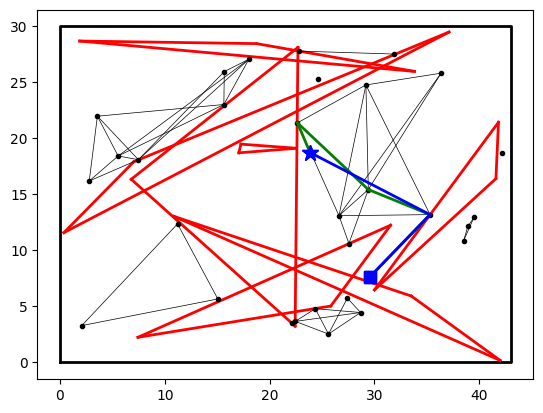

In [27]:
#a one-off test

width = 43
height = 30
obstacles = 7

pl.ion()
np.random.seed(4)
env = Environment(width, height, obstacles)
pl.clf()
env.plot()
num_samples = 30
edge_count = 2

query = env.random_query()
if query is not None:
    x_start, y_start, x_goal, y_goal = query
    start = Node(x_start, y_start)
    end = Node(x_goal, y_goal)
    env.plot_query(x_start, y_start, x_goal, y_goal)
    pf = PathFinder(start, end)
    while True:  
        roadMap = RoadMap()
        roadMap.sample_free_space(num_samples, (0,width), (0,height))
        roadMap.create_edges(edge_count)
        roadMap.start_end_edges(start,end)
        path = pf.a_star_search(roadMap)
        if not (path==None):
            print("Path found with sample size = ", num_samples, "  and edge_count = ", edge_count)
            roadMap.plot_path(path.edges)
            roadMap.plot_opt_path(pf.path_processing1(path).edges)
            env.plot_query(x_start, y_start, x_goal, y_goal)
            break
        else:
            # increasing the number of sampling points (nodes) if the path is not found. since PRM is complete when the number of nodes converge to infinity, we will eventually get a result.
            num_samples+=10

### Testing improvement

Addition of a threshold value (the formula was found after multiple rounds of testing).
The purpose is to prevent an infite loop in cases where either one of the points is boxed in by obstacles and there is no feasable path from the start ot end node. 

From observation, by the time the sample size <small>`num_samples`</small> reaches about the area, the path, if it exists, has been found. 

in the below testing code: 
variables <small>`num_environment`</small> and <small>`num_queries`</small> can be adjusted according to the environments and queries per environment one would like to test

and <small>`max_x`</small> , <small>`max_y`</small> , <small>`min_obstacles`</small> , <small>`max_obstacles`</small> can be adjusted to test different values of plane size and number of obstacles

Test 1: width =  56 , height =  76 , obstacle =  10 

Query 1 : start = Node(x=49.5151, y=48.4005), end = Node(x=53.5251, y=11.5433)
There is a direct path from start to end
Path found with sample size =  30   and edge_count =  4
Distance improved by  0.0


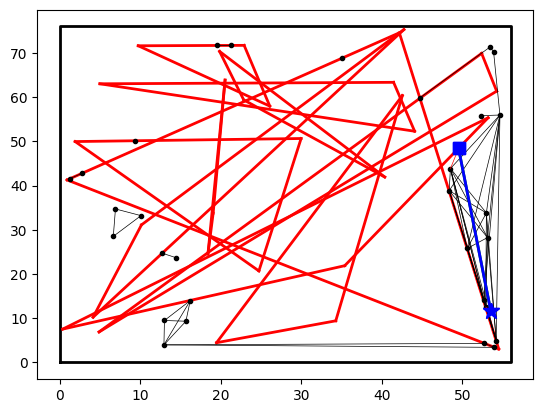

Query 2 : start = Node(x=2.4023, y=63.742), end = Node(x=35.6235, y=10.096)


In [28]:
#the number of environments to test
num_environment = 5
#the number of queries per environment to test
num_queries = 3

#max x value
max_x = 99
#max y value
max_y = 99
#max number of obstacles
max_obstacles = 10
#min number of obstacles
min_obstacles = 2

def testing_func(width, height, env):
    env = env
    num_samples = 30
    edge_count = 3
    threshold = int((width*height))
    for i in range(num_queries):
        env.plot()
        num_samples = 30
        edge_count = 4
        query = env.random_query()
        if query is not None:
            x_start, y_start, x_goal, y_goal = query
            start = Node(x_start, y_start)
            end = Node(x_goal, y_goal)
            print(f"Query {i+1} : start = {start}, end = {end}")
            env.plot_query(x_start, y_start, x_goal, y_goal)
            pf = PathFinder(start, end)
            while True:  
                roadMap = RoadMap()
                roadMap.sample_free_space(num_samples, (0,width), (0,height))
                roadMap.create_edges(edge_count)
                roadMap.start_end_edges(start,end)
                path = pf.a_star_search(roadMap)
                if not (path==None):
                    print("Path found with sample size = ", num_samples, "  and edge_count = ", edge_count)
                    roadMap.plot_path(path.edges)
                    roadMap.plot_opt_path(pf.path_processing1(path).edges)
                    env.plot_query(x_start, y_start, x_goal, y_goal)
                    pl.show()
                    break
                else:
                    if(num_samples>threshold):
                        print("Path cannot be found")
                        env.plot_query(x_start, y_start, x_goal, y_goal)
                        pl.show()
                        break
                    num_samples+=10

def generate_env_params():
    width = random.randint(1, max_x)
    height = random.randint(1, max_y)
    obstacle = random.randint(min_obstacles, max_obstacles)
    return (width, height, obstacle)

for i in range(num_environment):
    width ,height, obstacle = generate_env_params()
    env = Environment(width, height, obstacle)
    print(f"Test {i+1}: width = ",width, ", height = ", height, ", obstacle = ", obstacle, "\n")
    testing_func(width, height, env)



